In [12]:
#!pip install nltk
#!pip install imbalanced-learn

In [13]:
import pandas as pd
import re
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression
import numpy as np

import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aminm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aminm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
#read the file
df = pd.read_csv('labeled_data.csv')
df = df[df['class'] != 1]
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
40,40,3,0,1,2,2,""" momma said no pussy cats inside my doghouse """
63,63,3,0,0,3,2,"""@Addicted2Guys: -SimplyAddictedToGuys http://..."
66,66,3,0,1,2,2,"""@AllAboutManFeet: http://t.co/3gzUpfuMev"" woo..."
67,67,3,0,1,2,2,"""@Allyhaaaaa: Lemmie eat a Oreo &amp; do these..."


In [15]:
#convert the 0 into hateful and 1, 2 into non-hatefull
df['target'] = df['class'].apply(lambda x: 'hateful' if x == 0 else "non-hateful")

In [16]:
df = df[['tweet','target']]
df.head()

,tweet,target
0,!!! RT @mayasolovely: As a woman you shouldn't...,non-hateful
40,""" momma said no pussy cats inside my doghouse """,non-hateful
63,"""@Addicted2Guys: -SimplyAddictedToGuys http://...",non-hateful
66,"""@AllAboutManFeet: http://t.co/3gzUpfuMev"" woo...",non-hateful
67,"""@Allyhaaaaa: Lemmie eat a Oreo &amp; do these...",non-hateful


In [17]:
df["target"].value_counts()

target
non-hateful    4163
hateful        1430
Name: count, dtype: int64

In [18]:
df['tweet'] = df['tweet'].fillna("")

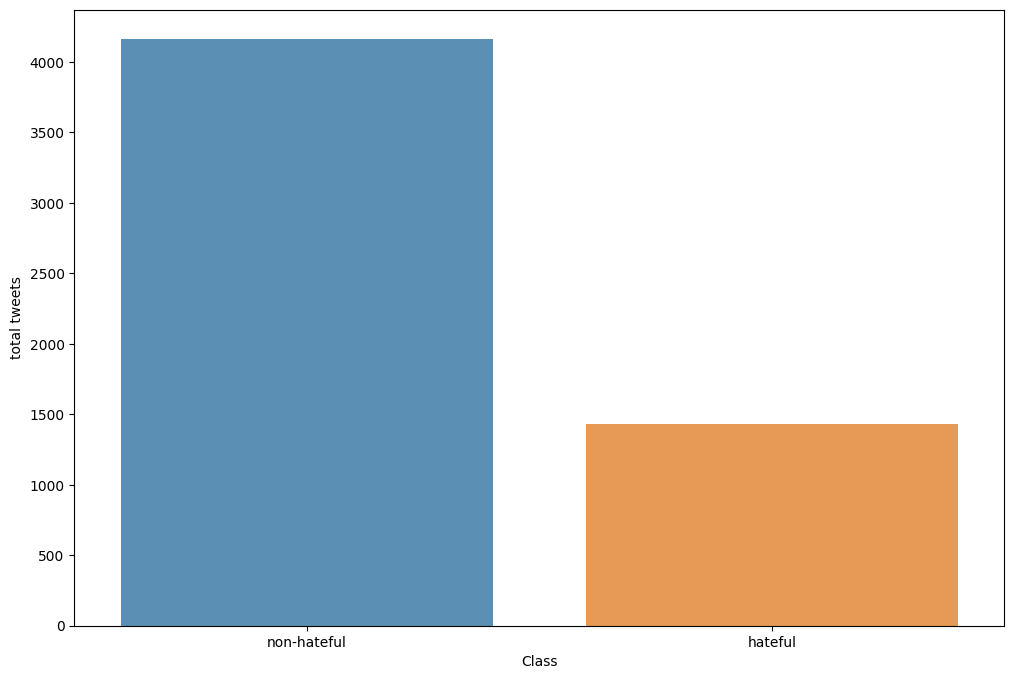

In [50]:

#import seaborn as sns

# Assuming you have a DataFrame 'df' with columns 'target'
x = list(df['target'].unique())
y = df['target'].value_counts()

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=x, y=y, alpha=0.8)
#plt.title("Your Title Here")
plt.xlabel("Class")
plt.ylabel("total tweets")
plt.show()

In [51]:
#change the boolean value if you don't check the stop words
from nltk.stem import WordNetLemmatizer
stop_word_flag = True

def clean_data(text_list,label_list):
    tokenizer = RegexpTokenizer(r'\w+')
    stemmer = PorterStemmer()
    lemmater = WordNetLemmatizer()
    stop_word = set(stopwords.words('english'))
    pre_text_list = []
    pre_label_list = []
    for i in range(len(text_list)):
        text_list[i] = re.sub('RT','',text_list[i])
        #normalize the case
        text_list[i] = text_list[i].lower()
        #remove the endline
        text_list[i] = re.sub('\n','',text_list[i])
        #Remove the tag, mentions and links
        text_list[i] = re.sub(r"(?:\@|http?\://|https?\://|www|#)\S+", "", text_list[i])
        #remove the punctiontions and numbers and remove the stop words
        text_list[i] = ' '.join([stemmer.stem(lemmater.lemmatize(word)) for word in tokenizer.tokenize(text_list[i]) if word not in stop_word and stop_word_flag])    
        if text_list[i]:
            pre_text_list.append(text_list[i])
            pre_label_list.append(label_list[i])
    return pre_text_list, pre_label_list
tweets_list, y_labels = clean_data(df['tweet'].tolist(),df['target'].tolist())

In [44]:
#y_labels

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
# TFIDF Vectoriztion that convert the word into numerical values/features
vect_tfidf = TfidfVectorizer()
#Fit and transform the training features
X_matrix = vect_tfidf.fit_transform(tweets_list)

In [24]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
#used SMOTE for balanced the dataset using oversampling
X_tfidf_smote, y_tfidf_smote = smt.fit_resample(X_matrix,y_labels)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
# Count Vectoriztion that convert the word into numerical values/features
vect_count = CountVectorizer()
#Fit and transform the training features
X_matrix = vect_count.fit_transform(tweets_list)

In [26]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
#used SMOTE for balanced the dataset using oversampling
X_count_smote, y_count_smote = smt.fit_resample(X_matrix,y_labels)

In [46]:
import glob
testset_file_names = [file for file in glob.glob('testset/*')]

In [47]:
testset_file_names

['testset\\hatecheck_test_data_group_black people.csv',
 'testset\\hatecheck_test_data_group_disabled people.csv',
 'testset\\hatecheck_test_data_group_gay people.csv',
 'testset\\hatecheck_test_data_group_immigrants.csv',
 'testset\\hatecheck_test_data_group_Muslims.csv',
 'testset\\hatecheck_test_data_group_trans people.csv',
 'testset\\hatecheck_test_data_group_women.csv']

In [35]:
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(hidden_layer_sizes=(128,64,32,), activation='relu' ,random_state=1, max_iter=300,verbose=True).fit(X_tfidf_smote, y_tfidf_smote)

Iteration 1, loss = 0.60077181
Iteration 2, loss = 0.16518058
Iteration 3, loss = 0.03801563
Iteration 4, loss = 0.01571873
Iteration 5, loss = 0.00741252
Iteration 6, loss = 0.00476776
Iteration 7, loss = 0.00357124
Iteration 8, loss = 0.00352266
Iteration 9, loss = 0.00260403
Iteration 10, loss = 0.00277744
Iteration 11, loss = 0.00201640
Iteration 12, loss = 0.00242084
Iteration 13, loss = 0.00232583
Iteration 14, loss = 0.00224622
Iteration 15, loss = 0.00247585
Iteration 16, loss = 0.00180891
Iteration 17, loss = 0.00253032
Iteration 18, loss = 0.00233979
Iteration 19, loss = 0.00259795
Iteration 20, loss = 0.00206217
Iteration 21, loss = 0.00238693
Iteration 22, loss = 0.00189923
Iteration 23, loss = 0.00183035
Iteration 24, loss = 0.00190932
Iteration 25, loss = 0.00191957
Iteration 26, loss = 0.00173225
Iteration 27, loss = 0.00167078
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [16]:
# #Cross Validation
# k_fold = 8
# cross_val_score(estimator = clf_mlp, X = X_count_smote, y = y_count_smote, cv = k_fold)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
for file_name in testset_file_names:
    #read the test file 
    df_test = pd.read_csv(file_name)
    #clean the text of test set
    X_test, y_test = clean_data(df_test["text"].tolist(),df_test["label"].tolist())
    #transform the matrix
    X_test_Matrix = vect_tfidf.transform(X_test)
    #predict the matrix
    y_pred = clf_mlp.predict(X_test_Matrix)
    title = 'TestSet({}) LogisticRegression using TfidfVectorizer'.format(file_name[8:-4])
    print(title)
    cls_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Classification Report")
    print(cls_report)
    print("Confusion Matrix")
    print(conf_matrix)
    print("-"*110)

TestSet(hatecheck_test_data_group_black people) LogisticRegression using TfidfVectorizer
Classification Report
              precision    recall  f1-score   support

     hateful       0.75      0.64      0.69       357
 non-hateful       0.28      0.40      0.33       125

    accuracy                           0.58       482
   macro avg       0.52      0.52      0.51       482
weighted avg       0.63      0.58      0.60       482

Confusion Matrix
[[230 127]
 [ 75  50]]
--------------------------------------------------------------------------------------------------------------
TestSet(hatecheck_test_data_group_disabled people) LogisticRegression using TfidfVectorizer
Classification Report
              precision    recall  f1-score   support

     hateful       0.81      0.42      0.56       373
 non-hateful       0.25      0.66      0.37       111

    accuracy                           0.48       484
   macro avg       0.53      0.54      0.46       484
weighted avg       0.68  

In [55]:
X_test_Matrix

<509x8064 sparse matrix of type '<class 'numpy.int64'>'
	with 1824 stored elements in Compressed Sparse Row format>

In [53]:
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(hidden_layer_sizes=(128,64,32,), activation='relu' ,random_state=1, max_iter=300,verbose=True).fit(X_count_smote, y_count_smote)

Iteration 1, loss = 0.54668627
Iteration 2, loss = 0.15678569
Iteration 3, loss = 0.06248380
Iteration 4, loss = 0.03287327
Iteration 5, loss = 0.02249258
Iteration 6, loss = 0.01624618
Iteration 7, loss = 0.01377344
Iteration 8, loss = 0.01223907
Iteration 9, loss = 0.01135732
Iteration 10, loss = 0.01063058
Iteration 11, loss = 0.01054599
Iteration 12, loss = 0.00970911
Iteration 13, loss = 0.00985180
Iteration 14, loss = 0.01010576
Iteration 15, loss = 0.01025534
Iteration 16, loss = 0.01016256
Iteration 17, loss = 0.00857675
Iteration 18, loss = 0.01013645
Iteration 19, loss = 0.00914147
Iteration 20, loss = 0.00892353
Iteration 21, loss = 0.00948132
Iteration 22, loss = 0.00908359
Iteration 23, loss = 0.00862741
Iteration 24, loss = 0.00851941
Iteration 25, loss = 0.00838264
Iteration 26, loss = 0.00831621
Iteration 27, loss = 0.01003808
Iteration 28, loss = 0.00945461
Iteration 29, loss = 0.01013510
Iteration 30, loss = 0.00850695
Iteration 31, loss = 0.00880565
Iteration 32, los

In [54]:
for file_name in testset_file_names:
    #read the test file
    df_test = pd.read_csv(file_name)
    #clean the text of test set
    X_test, y_test = clean_data(df_test["text"].tolist(),df_test["label"].tolist())
    #transform the matrix
    X_test_Matrix = vect_count.transform(X_test)
    #predict the matrix
    y_pred = clf_mlp.predict(X_test_Matrix)
    title = 'TestSet({}) LogisticRegression using CountVectorizer'.format(file_name[8:-4])
    print(title)
    cls_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Classification Report")
    print(cls_report)
    print("Confusion Matrix")
    print(conf_matrix)
    print("-"*110)

TestSet(hatecheck_test_data_group_black people) LogisticRegression using CountVectorizer
Classification Report
              precision    recall  f1-score   support

     hateful       0.76      0.95      0.84       357
 non-hateful       0.47      0.14      0.21       125

    accuracy                           0.74       482
   macro avg       0.62      0.54      0.53       482
weighted avg       0.68      0.74      0.68       482

Confusion Matrix
[[338  19]
 [108  17]]
--------------------------------------------------------------------------------------------------------------
TestSet(hatecheck_test_data_group_disabled people) LogisticRegression using CountVectorizer
Classification Report
              precision    recall  f1-score   support

     hateful       0.81      0.87      0.84       373
 non-hateful       0.41      0.31      0.35       111

    accuracy                           0.74       484
   macro avg       0.61      0.59      0.60       484
weighted avg       0.72  